In [56]:
# Load the new (SPM) PNC

import pickle
from pathlib import Path
import numpy as np

newdir = '/home/anton/Documents/Tulane/Research/ImageNomer/data/anton/cohorts/PNC'
newdemo = pickle.load(open(f'{newdir}/demographics.pkl', 'rb'))

newrace = []
newfc = []

for sub in newdemo['Race']:
    for task in ['rest', 'nback', 'emoid']:
        if newdemo['Race'][sub] not in ['AA', 'EA']:
            continue
        f = f'{newdir}/fc/{sub}_task-{task}_fc.npy'
        if not Path(f).exists():
            continue
        p = np.load(f)
        r = int(newdemo['Race'][sub] == 'AA')
        newfc.append(p)
        newrace.append(r)
        
newrace = np.stack(newrace)
newfc = np.stack(newfc)

print(newrace.shape)
print(newfc.shape)

(3849,)
(3849, 34716)


In [57]:
# Load the old (fmriprep) PNC

olddir = '/home/anton/Documents/Tulane/Research/ImageNomer/data/anton/cohorts/test'
olddemo = pickle.load(open(f'{olddir}/demographics.pkl', 'rb'))

oldrace = []
oldfc = []

for sub in olddemo['race']:
    for task in ['rest', 'nback', 'emoid']:
        if olddemo['race'][sub] not in ['AA', 'EA']:
            continue
        f = f'{olddir}/fc/{sub}_task-{task}_fc.npy'
        if not Path(f).exists():
            continue
        p = np.load(f)
        r = int(olddemo['race'][sub] == 'AA')
        oldfc.append(p)
        oldrace.append(r)
        
oldrace = np.stack(oldrace)
oldfc = np.stack(oldfc)

print(oldrace.shape)
print(oldfc.shape)

(2199,)
(2199, 34716)


In [59]:
# Load BSNIP

bsnipdir = '/home/anton/Documents/Tulane/Research/ImageNomer/data/anton/cohorts/BSNIP'
bsnipdemo = pickle.load(open(f'{bsnipdir}/demographics.pkl', 'rb'))

bsniprace = []
bsnipfc = []

for sub in bsnipdemo['Race']:
    for task in ['unk']:
        if bsnipdemo['Race'][sub] not in ['AA', 'CA']:
            continue
        f = f'{bsnipdir}/fc/{sub}_task-{task}_fc.npy'
        if not Path(f).exists():
            continue
        p = np.load(f)
        r = int(bsnipdemo['Race'][sub] == 'AA')
        bsnipfc.append(p)
        bsniprace.append(r)
        
bsniprace = np.stack(bsniprace)
bsnipfc = np.stack(bsnipfc)

print(bsniprace.shape)
print(bsnipfc.shape)

(1165,)
(1165, 34716)


In [54]:
# Sample random sz
# IGNORE THIS Testing Kids vs SZ Adults

def cat(lst):
    return np.concatenate(lst)

idcs = np.random.permutation(199)
sz1x = bsnipfc[idcs][:99]
sz2x = bsnipfc[idcs][100:199]

idcs_hc = np.random.permutation(newfc.shape[0])
hc1x = newfc[idcs_hc][:99]
hc2x = newfc[idcs_hc][100:199]

xtr = cat([hc1x, sz1x])
xt = cat([hc2x, sz2x])
ytr = cat([np.zeros(99), np.ones(99)])
yt = ytr

print([a.shape for a in [xtr, xt, ytr, yt]])

[(198, 34716), (198, 34716), (198,), (198,)]


In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

xx = np.concatenate([newfc])
yy = np.concatenate([newrace])

xtr, xt, ytr, yt = train_test_split(xx, yy, stratify=yy, train_size=0.5)
clf = LogisticRegression(C=100, max_iter=1000).fit(xtr, ytr)
yhat = clf.predict(xt)
print(np.mean(yhat == yt))

0.9184415584415584


0.779899954524784


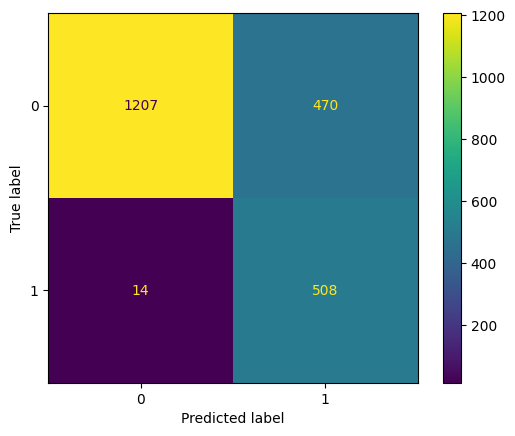

In [50]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

xxx = oldfc
yyy = oldrace

yhat = clf.predict(xxx)
print(np.mean(yhat == yyy))

cm = confusion_matrix(yhat, yyy, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

In [21]:
sz1, sz2 = 0, 0

for sub in bsnipdemo['sex']:
    if bsnipdemo['DXGROUP_1'][sub] == 'SZP':
        if bsnipdemo['sex'][sub] == 's1.0':
            sz1 += 1
        else:
            sz2 += 1
            
print(sz1, sz2)

138 61


In [19]:
bsnipdemo.keys()

dict_keys(['DXGROUP_1', 'DXGROUP_2', 'sex', 'ethnic', 'Race', 'handed', 'MED_PSYCHOTROPIC', 'MED_ANTIP_ANY_PRI', 'MED_ANTIP_FIRSTGEN_SEC', 'MED_ANTIP_SECONDGEN_SEC', 'MED_ANTID_ANY_PRI', 'MED_ANTID_TRICYCLIC_SEC', 'MED_ANTID_MAOI_SEC', 'MED_ANTID_SSRI_SEC', 'MED_ANTID_MISC_SEC', 'MED_MOOD_ANY_PRI', 'MED_MOOD_LITHIUM_SEC', 'MED_MOOD_ANTICONVUL_SEC', 'MED_ANX_HYP_PRI', 'MED_ANTICHOL_PRI', 'MED_CENT_ACTIVE_PRI', 'MED_STIMULANTS_PRI', 'Age_cal', 'I2a', 'PANSS_PosTotal', 'PANSS_NegTotal', 'PANSS_GenTotal', 'PANSS_Total', 'pt_hollscore', 'mo_hollscore', 'fa_hollscore', 'Family_hollscore', 'sz_subtype', 'sad_subtype', 'bp_subtype'])